<a href="https://colab.research.google.com/github/natthanich/BasicProg_DataViz65/blob/main/DataViz65_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Members
1. นายธนภัทร โสภณ 633020444-1
2. นางสาวณัฐนิช หิรัญชวโรจน์ 633020552-8
3. นายเฉลิมเกียรติ คำชะนาม 633021013-3
- ชื่อกลุ่ม หมีเรื่องแล้ว

ข้อสอบจำนวน 1 ข้อ คะแนน 120 เต็ม 100 คะแนน

จุดมุ่งหมาย: ตัดเกรดรายวิชา Project และวาดกราฟแสดงผลการสอบดังรายละเอียดต่อไปนี้

1. คะแนนประกอบด้วย 2 ส่วน
- คะแนน 40% จากอาจารย์ที่ปรึกษา (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)
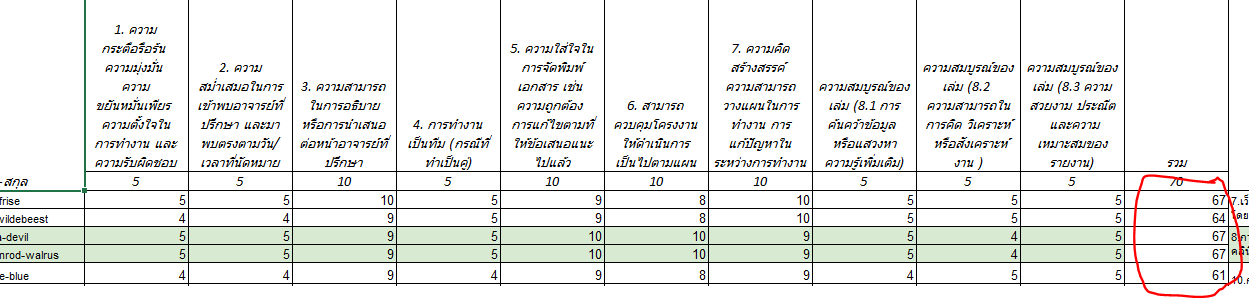

- คะแนน 60% จากกรรมการในห้องโดยมีการสอบทั้งหมดสามวันอยู่คนละ sheet (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) *(คะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน ท่านละ 30%)*

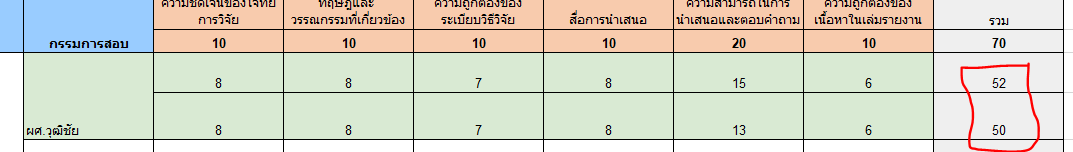

ดาวน์โหลดไฟล์คะแนนทั้งหมดจาก https://drive.google.com/drive/folders/1YB4qdluEN8dCE7vhDrNOW40JoUDyeEyL?usp=sharing

2. รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน
*คะแนนรวม 60 คะแนน (ดึงข้อมูลและรวมข้อมูล 40 ตัดเกรด 20)* 3. วาดกราฟ

- Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)
- Histogram แสดงจำนวนผู้ได้เกรดต่างๆ
- Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา
*คะแนนรวม 60 คะแนน (ข้อละ 20 คะแนน)*

# ตัวอย่าง code บางส่วน ที่อาจจะมีประโยชน์กับการทำข้อสอบ

In [1]:
#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/Final BPVZ65')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/MyDrive/Final BPVZ65


# 🔗Open CSV file & Cleaning data

## คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx

In [3]:
import pandas as pd

### วันที่ 7

In [4]:
day7 = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1)
day7.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60
4,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,9,8,8,9,16,8,58


In [5]:
testday7 = day7.fillna(method='ffill')
testday7.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58


In [6]:
testday7.shape

(55, 13)

In [7]:
testday7 = testday7.dropna(subset=['ห้องสอบ','เวลา','ชื่อเรื่อง','นักศึกษา','อาจารย์'])
testday7.shape

(54, 13)

### วันที่ 8

In [8]:
day8 = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=1,skiprows=1)
day8.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,9.0,9,9.0,8.0,18.0,8.0,61
3,NaN,NaN,NaN,tasty-myrtle-ant,NaN,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,8.0,8,9.0,9.0,17.0,9.0,60


In [9]:
testday8 = day8.fillna(method='ffill')
testday8.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60


In [10]:
testday8.shape

(53, 13)

In [11]:
testday8 = testday8.dropna(subset=['ห้องสอบ','เวลา','ชื่อเรื่อง','นักศึกษา','อาจารย์'])
testday8.shape

(52, 13)

### วันที่ 9

In [12]:
day9 = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=2,skiprows=1)
day9.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,NaN,NaN,NaN,NaN,NaN,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,NaN,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,NaN,NaN,NaN,craggy-cream-paradise,NaN,NaN,9.0,8.0,8.0,8.0,16.0,8.0,57


In [13]:
testday9 = day9.fillna(method='ffill')
testday9.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57


In [14]:
testday9.shape

(55, 13)

In [15]:
testday9 = testday9.dropna(subset=['ห้องสอบ','เวลา','ชื่อเรื่อง','นักศึกษา','อาจารย์'])
testday9.shape

(54, 13)

###  Merge 

In [16]:
testday = pd.concat([testday7,testday8,testday9])
testday.shape

(160, 13)

In [17]:
testday.columns #ดูว่ามี คอลัมน์ ไหนบ้าง

Index(['ห้องสอบ', 'เวลา', 'ชื่อเรื่อง', 'นักศึกษา', 'อาจารย์', 'กรรมการสอบ',
       'ความชัดเจนของโจทย์การวิจัย',
       'ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง',
       'ความถูกต้องของระเบียบวิธีวิจัย', 'สื่อการนำเสนอ',
       'ความสามารถในการนำเสนอและตอบคำถาม', 'ความถูกต้องของเนื้อหาในเล่มรายงาน',
       'รวม'],
      dtype='object')

In [18]:
#เลือกคอลัมน์ที่ต้องการ
testday = testday[['ห้องสอบ', 'เวลา', 'ชื่อเรื่อง', 'นักศึกษา', 'อาจารย์', 'กรรมการสอบ','รวม']]
testday.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,58
5,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,52


In [19]:
testday.isnull().any()

ห้องสอบ       False
เวลา          False
ชื่อเรื่อง    False
นักศึกษา      False
อาจารย์       False
กรรมการสอบ    False
รวม           False
dtype: bool

### แปลงคะแนน

In [20]:
testday['รวม'] = (testday['รวม']/70) * 30
testday.head(3)

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,22.285714
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,21.428571
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,25.714286


In [21]:
testdays = testday.groupby(['นักศึกษา'])[['รวม']].sum().reset_index()
testdays

,นักศึกษา,รวม
0,boozy-thistle-wildebeest,49.285714
1,breezy-pear-macaw,48.000000
2,bumpy-indigo-dolphin,45.857143
3,chewy-lilac-shark,47.571429
4,chewy-persimmon-catfish,40.714286
...,...,...
75,ugly-harlequin-octopus,49.714286
76,ugly-myrtle-walrus,40.714286
77,whiny-peach-audemer,41.571429
78,whiny-pear-otter,49.714286


In [22]:
testdays.max()

นักศึกษา    wiggy-silver-drever
รวม                   53.571429
dtype: object

In [23]:
#check
testdays[testdays['นักศึกษา']== 'tasty-myrtle-ant']

,นักศึกษา,รวม
74,tasty-myrtle-ant,52.714286


## คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx

### ดร.ธิปไตย

In [25]:
AjTippatai = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธิปไตย',skiprows=1)
AjTippatai.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,NaN
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,NaN


In [26]:
Aj_Tippatai = AjTippatai.fillna(method='ffill')
Aj_Tippatai.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...


In [27]:
Aj_Tippatai.shape

(9, 13)

In [28]:
Aj_Tippatai = Aj_Tippatai.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Tippatai.shape

(8, 13)

### รศ.ธิดาเดียว

In [29]:
AjTidadeaw = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.ธิดาเดียว',skiprows=1)
AjTidadeaw.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5.0,5.0,70,NaN
1,paltry-plum-saola,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...
2,cloudy-wheat-bobcat,5,5,9,5,10,9,9,5,4.5,4.5,66,NaN
3,gloppy-persimmon-flamingo,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...
4,sleepy-gamboge-zebra,5,5,9,5,9,9,9,5,4.5,4.5,65,NaN


In [30]:
Aj_Tidadeaw = AjTidadeaw.fillna(method='ffill')
Aj_Tidadeaw.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5.0,5.0,70,NaN
1,paltry-plum-saola,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...
2,cloudy-wheat-bobcat,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...
3,gloppy-persimmon-flamingo,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...
4,sleepy-gamboge-zebra,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...


In [31]:
Aj_Tidadeaw.shape

(7, 13)

In [32]:
Aj_Tidadeaw = Aj_Tidadeaw.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Tidadeaw.shape

(6, 13)

### ผศ.สุกัญญา

In [33]:
AjSukanya = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.สุกัญญา',skiprows=1)
AjSukanya.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,whiny-pear-otter,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...
2,craggy-cream-reindeer,5,5,8,5,9,10,8,5,4,4,63,NaN
3,cloudy-myrtle-kudu,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...
4,lovely-asparagus-urchin,5,5,9,5,9,10,9,5,5,4,66,NaN


In [34]:
Aj_Sukanya = AjSukanya.fillna(method='ffill')
Aj_Sukanya.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,whiny-pear-otter,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...
2,craggy-cream-reindeer,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...
3,cloudy-myrtle-kudu,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...
4,lovely-asparagus-urchin,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...


In [35]:
Aj_Sukanya.shape

(7, 13)

In [36]:
Aj_Sukanya = Aj_Sukanya.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Sukanya.shape

(6, 13)

### ดร.ธนพงศ์

In [37]:
AjThanapong = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธนพงศ์',skiprows=1)
AjThanapong.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,NaN
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,NaN


In [38]:
Aj_Thanapong = AjThanapong.fillna(method='ffill')
Aj_Thanapong.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...


In [39]:
Aj_Thanapong.shape

(8, 13)

In [40]:
Aj_Thanapong = Aj_Thanapong.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Thanapong.shape

(7, 13)

### ผศ.วุฒิชัย

In [41]:
AjWuttichai = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.วุฒิชัย',skiprows=1)
AjWuttichai.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5.0,10,10,10,5,5,5,70,NaN
1,lumpy-carmine-slug,5,5,10,NaN,10,10,10,5,5,5,70,9.ตัวแบบทำนายความรุนแรงของการบาดเจ็บทางการจราจ...
2,snappy-azure-balinese,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...
3,pasty-bronze-booby,5,5,9,5.0,9,9,9,5,4,5,65,NaN
4,pokey-asparagus-frise,5,4,9,5.0,9,9,9,5,4,5,64,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...


In [42]:
Aj_Wuttichai = AjWuttichai.fillna(method='ffill')
Aj_Wuttichai.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5.0,10,10,10,5,5,5,70,NaN
1,lumpy-carmine-slug,5,5,10,5.0,10,10,10,5,5,5,70,9.ตัวแบบทำนายความรุนแรงของการบาดเจ็บทางการจราจ...
2,snappy-azure-balinese,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...
3,pasty-bronze-booby,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...
4,pokey-asparagus-frise,5,4,9,5.0,9,9,9,5,4,5,64,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...


In [43]:
Aj_Wuttichai.shape

(6, 13)

In [44]:
Aj_Wuttichai = Aj_Wuttichai.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Wuttichai.shape

(5, 13)

### รศ.สุพรรณี

In [45]:
AjSupunnee = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.สุพรรณี',skiprows=1)
AjSupunnee.head() 

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,70,NaN
1,chewy-persimmon-catfish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...
2,skanky-amaranth-ostrich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN
3,greasy-eggplant-oyster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...
4,randy-mauve-ibis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN


In [46]:
AjSupunnee[['1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ','2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย','3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา','4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)','5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว','6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน','7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน','ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)','ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )','ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน)']] = AjSupunnee[['1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ','2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย','3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา','4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)','5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว','6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน','7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน','ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)','ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )','ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน)']].fillna(0)
AjSupunnee

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,70,NaN
1,chewy-persimmon-catfish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...
2,skanky-amaranth-ostrich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,NaN
3,greasy-eggplant-oyster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...
4,randy-mauve-ibis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63,NaN
5,hazy-beige-stoat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,13.ความคิดเห็นต่อปัจจัยที่ส่งผลในการเลือกใช้บร...
6,squirrely-seashell-kingfisher,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,NaN
7,surly-linen-hyena,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,25.การเตรียมความพร้อมต่อการเปลี่ยนแปลงเข้าสู่ร...
8,nippy-lilac-chin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,NaN


In [47]:
Aj_Supunnee = AjSupunnee.fillna(method='ffill')
Aj_Supunnee.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,70,NaN
1,chewy-persimmon-catfish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...
2,skanky-amaranth-ostrich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...
3,greasy-eggplant-oyster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...
4,randy-mauve-ibis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...


In [48]:
Aj_Supunnee.shape

(9, 13)

In [49]:
Aj_Supunnee = Aj_Supunnee.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Supunnee.shape

(8, 13)

### อ.ยุภาพร

In [50]:
AjYuparporn = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ยุภาพร',skiprows=1)
AjYuparporn.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,nerdy-plum-abyssinian,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...
2,gloppy-xanthic-retriever,5,5,10,5,10,10,9,4,4,5,67,NaN
3,cloudy-myrtle-whippet,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...
4,cloudy-grey-walrus,5,5,10,5,10,10,9,4,4,5,67,NaN


In [51]:
Aj_Yuparporn = AjYuparporn.fillna(method='ffill')
Aj_Yuparporn.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,nerdy-plum-abyssinian,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...
2,gloppy-xanthic-retriever,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...
3,cloudy-myrtle-whippet,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...
4,cloudy-grey-walrus,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...


In [52]:
Aj_Yuparporn.shape

(7, 13)

In [53]:
Aj_Yuparporn = Aj_Yuparporn.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Yuparporn.shape

(6, 13)

### ดร.พลากร

In [54]:
AjPalakorn = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.พลากร',skiprows=1)
AjPalakorn.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,craggy-mustard-sponge,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...
2,fuzzy-silver-discus,4,4,8,5,7,8,7,4,4,4,55,NaN
3,lousy-corn-mule,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...
4,muggy-charcoal-akita,5,5,9,5,9,8,8,5,5,5,64,NaN


In [55]:
Aj_Palakorn = AjPalakorn.fillna(method='ffill')
Aj_Palakorn.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,craggy-mustard-sponge,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...
2,fuzzy-silver-discus,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...
3,lousy-corn-mule,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...
4,muggy-charcoal-akita,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...


In [56]:
Aj_Palakorn.shape

(7, 13)

In [57]:
Aj_Palakorn = Aj_Palakorn.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Palakorn.shape

(6, 13)

### รศ.วิชุดา

In [58]:
AjWichuda = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.วิชุดา',skiprows=1)
AjWichuda.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5,10,10.0,10,5.0,5,5.0,70.0,NaN
1,tasty-myrtle-ant,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...
2,skanky-burgundy-kingfisher,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,NaN
3,sleazy-mauve-akita,5.0,5.0,7.0,5,8,8.0,8,5.0,5,5.0,61.0,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...
4,crappy-burgundy-quoll,5.0,5.0,8.0,5,8,8.0,8,5.0,5,5.0,62.0,NaN


In [59]:
Aj_Wichuda = AjWichuda.fillna(method='ffill')
Aj_Wichuda.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5,10,10.0,10,5.0,5,5.0,70.0,NaN
1,tasty-myrtle-ant,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...
2,skanky-burgundy-kingfisher,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...
3,sleazy-mauve-akita,5.0,5.0,7.0,5,8,8.0,8,5.0,5,5.0,61.0,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...
4,crappy-burgundy-quoll,5.0,5.0,8.0,5,8,8.0,8,5.0,5,5.0,62.0,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...


In [60]:
Aj_Wichuda.shape

(10, 13)

In [61]:
Aj_Wichuda = Aj_Wichuda.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Wichuda.shape

(9, 13)

### ดร.วรรณพร

In [62]:
AjWannaporn = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.วรรณพร',skiprows=1)
AjWannaporn.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70.0,NaN
1,skinny-bronze-dormouse,5,5,8,5,8,9,10,5,4,5,64.0,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...
2,freaky-lemon-peccary,5,5,7,5,8,9,9,5,4,5,62.0,NaN
3,flabby-green-fish,5,5,8,5,9,9,10,5,5,5,66.0,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...
4,skinny-heliotrope-kudu,5,5,10,5,9,9,10,5,5,5,68.0,NaN


In [63]:
Aj_Wannaporn = AjWannaporn.fillna(method='ffill')
Aj_Wannaporn.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70.0,NaN
1,skinny-bronze-dormouse,5,5,8,5,8,9,10,5,4,5,64.0,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...
2,freaky-lemon-peccary,5,5,7,5,8,9,9,5,4,5,62.0,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...
3,flabby-green-fish,5,5,8,5,9,9,10,5,5,5,66.0,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...
4,skinny-heliotrope-kudu,5,5,10,5,9,9,10,5,5,5,68.0,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...


In [64]:
Aj_Wannaporn.shape

(6, 13)

In [65]:
Aj_Wannaporn = Aj_Wannaporn.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Wannaporn.shape

(5, 13)

### อ.ธรรณญพร

In [66]:
AjThanyaporn = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ธรรณญพร',skiprows=1)
AjThanyaporn.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chewy-lilac-shark,5,5,8,5,9,9,8,4,4,4,61,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...
2,greasy-olivine-neanderthal,4,5,8,5,9,9,8,4,4,4,60,NaN
3,hasty-dandelion-grasshopper,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...
4,ugly-myrtle-walrus,5,5,8,5,9,9,9,4,4,4,62,NaN


In [67]:
Aj_Thanyaporn = AjThanyaporn.fillna(method='ffill')
Aj_Thanyaporn.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chewy-lilac-shark,5,5,8,5,9,9,8,4,4,4,61,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...
2,greasy-olivine-neanderthal,4,5,8,5,9,9,8,4,4,4,60,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...
3,hasty-dandelion-grasshopper,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...
4,ugly-myrtle-walrus,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...


In [68]:
Aj_Thanyaporn.shape

(9, 13)

In [69]:
Aj_Thanyaporn = Aj_Thanyaporn.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Thanyaporn.shape

(8, 13)

### ดร.อุทุมพร

In [70]:
AjLim = pd.read_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.อุทุมพร',skiprows=1)
AjLim.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chummy-azure-walrus,5,5,9,5,10,10,10,4,5,5,68,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...
2,breezy-pear-macaw,5,5,10,5,10,10,10,4,5,5,69,NaN
3,cozy-tangerine-ladybird,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...
4,scaly-pumpkin-monkey,4,5,8,5,9,9,9,4,4,5,62,NaN


In [71]:
Aj_Lim = AjLim.fillna(method='ffill')
Aj_Lim.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chummy-azure-walrus,5,5,9,5,10,10,10,4,5,5,68,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...
2,breezy-pear-macaw,5,5,10,5,10,10,10,4,5,5,69,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...
3,cozy-tangerine-ladybird,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...
4,scaly-pumpkin-monkey,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...


In [72]:
Aj_Lim.shape

(7, 13)

In [73]:
Aj_Lim = Aj_Lim.dropna(subset=['Unnamed: 0','Unnamed: 12'])
Aj_Lim.shape

(6, 13)

###  Merge 

In [74]:
Advisor = pd.concat([Aj_Tippatai,Aj_Tidadeaw,Aj_Sukanya,Aj_Thanapong,Aj_Wuttichai,Aj_Supunnee,Aj_Yuparporn,Aj_Palakorn,Aj_Wichuda,Aj_Wannaporn,Aj_Thanyaporn,Aj_Lim])
Advisor.shape

(80, 13)

In [75]:
Advisor.columns #ดูว่ามี คอลัมน์ ไหนบ้าง

Index(['Unnamed: 0',
       '1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ',
       '2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย',
       '3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา',
       '4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่)',
       '5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว',
       '6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน',
       '7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน',
       'ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม)',
       'ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน )',
       'ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน)',
       'รวม', 'Unnamed: 12'],
      dtype='object')

In [76]:
#เลือกคอลัมน์ที่ต้องการ
Advisor = Advisor[['Unnamed: 0','Unnamed: 12' ,'รวม']]
Advisor.head()

,Unnamed: 0,Unnamed: 12,รวม
1,leaky-rust-chameleon,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,68.0
2,greasy-ruby-bombay,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,61.0
3,wiggy-silver-drever,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,67.0
4,stinky-red-chow,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,67.0
5,bumpy-indigo-dolphin,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...,67.0


In [77]:
#เปลี่ยนชื่อ columns ของตาราง Advisor ให้มีชื่่อเหมือนกับชื่อ ของคอลัมน์ในตาราง testday 
Advisor.rename(columns={'Unnamed: 0': 'นักศึกษา', 'Unnamed: 12': 'ชื่อเรื่อง'}, inplace=True)
Advisor.head(3)

,นักศึกษา,ชื่อเรื่อง,รวม
1,leaky-rust-chameleon,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,68.0
2,greasy-ruby-bombay,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,61.0
3,wiggy-silver-drever,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,67.0


In [78]:
Advisor.isnull().any()

นักศึกษา      False
ชื่อเรื่อง    False
รวม           False
dtype: bool

### แปลงคะแนน

In [79]:
Advisor['รวม'] = (Advisor['รวม']/70) * 40
Advisor.head(3)

,นักศึกษา,ชื่อเรื่อง,รวม
1,leaky-rust-chameleon,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,38.857143
2,greasy-ruby-bombay,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,34.857143
3,wiggy-silver-drever,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714


# Merge table Advisor กับ testdays

In [80]:
All = Advisor.merge(testdays, how ='left', left_on=['นักศึกษา'], right_on=['นักศึกษา'])
All

,นักศึกษา,ชื่อเรื่อง,รวม_x,รวม_y
0,leaky-rust-chameleon,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,38.857143,48.000000
1,greasy-ruby-bombay,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,34.857143,46.285714
2,wiggy-silver-drever,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714,42.857143
3,stinky-red-chow,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714,42.857143
4,bumpy-indigo-dolphin,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...,38.285714,45.857143
...,...,...,...,...
75,breezy-pear-macaw,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...,39.428571,48.000000
76,cozy-tangerine-ladybird,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...,35.428571,44.571429
77,scaly-pumpkin-monkey,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...,35.428571,44.571429
78,scanty-razzmatazz-rabbit,35.การทำนายการรอดชีวิตของผู้ป่วยโรคหอบหืดโดยอา...,37.142857,43.285714


In [81]:
All.rename(columns={'รวม_x': 'รวมคะแนนจากอาจารย์ที่ปรึกษา', 'รวม_y': 'รวมคะแนนจากการสอบ'}, inplace=True)
All.head(3)

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ
0,leaky-rust-chameleon,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,38.857143,48.000000
1,greasy-ruby-bombay,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,34.857143,46.285714
2,wiggy-silver-drever,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714,42.857143


In [82]:
All['คะแนนรวม'] =  (All['รวมคะแนนจากอาจารย์ที่ปรึกษา'] + All['รวมคะแนนจากการสอบ'])
All

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม
0,leaky-rust-chameleon,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,38.857143,48.000000,86.857143
1,greasy-ruby-bombay,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,34.857143,46.285714,81.142857
2,wiggy-silver-drever,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714,42.857143,81.142857
3,stinky-red-chow,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714,42.857143,81.142857
4,bumpy-indigo-dolphin,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...,38.285714,45.857143,84.142857
...,...,...,...,...,...
75,breezy-pear-macaw,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...,39.428571,48.000000,87.428571
76,cozy-tangerine-ladybird,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...,35.428571,44.571429,80.000000
77,scaly-pumpkin-monkey,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...,35.428571,44.571429,80.000000
78,scanty-razzmatazz-rabbit,35.การทำนายการรอดชีวิตของผู้ป่วยโรคหอบหืดโดยอา...,37.142857,43.285714,80.428571


# โจทย์

## 2. รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน
*คะแนนรวม 60 คะแนน (ดึงข้อมูลและรวมข้อมูล 40 ตัดเกรด 20)

*  ถ้าคะแนนอยู่ระหว่างมากกว่าหรือเท่ากับ  0  แต่น้อยกว่า 50 จะได้เกรด F
*  ถ้าคะแนนอยู่ระหว่างมากกว่าหรือเท่ากับ 50 แต่น้อยกว่า 55 จะได้เกรด D
*  ถ้าคะแนนอยู่ระหว่างมากกว่าหรือเท่ากับ 55 แต่น้อยกว่า 60 จะได้เกรด D+
*  ถ้าคะแนนอยู่ระหว่างมากกว่าหรือเท่ากับ 60 แต่น้อยกว่า 65 จะได้เกรด C
*  ถ้าคะแนนอยู่ระหว่างมากกว่าหรือเท่ากับ 65 แต่น้อยกว่า 70 จะได้เกรด C+
*  ถ้าคะแนนอยู่ระหว่างมากกว่าหรือเท่ากับ 70 แต่น้อยกว่า 75 จะได้เกรด B
*  ถ้าคะแนนอยู่ระหว่างมากกว่าหรือเท่ากับ 75 แต่น้อยกว่า 80 จะได้เกรด B+
*  ถ้าคะแนนอยู่ระหว่างมากกว่าหรือเท่ากับ 80  จะได้เกรด A
*  ถ้าคะแนนไม่อยู่ในช่วง 0-100 ให้ return 'ไม่สามารถตัดเกรดได้'

In [135]:
import numpy as np

In [145]:
scoresA = All[All['คะแนนรวม']>=80]
scoresA.insert(5,"Grade","A")
scoresA.head()

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม,Grade
0,leaky-rust-chameleon,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,38.857143,48.000000,86.857143,A
1,greasy-ruby-bombay,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,34.857143,46.285714,81.142857,A
2,wiggy-silver-drever,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714,42.857143,81.142857,A
3,stinky-red-chow,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714,42.857143,81.142857,A
4,bumpy-indigo-dolphin,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...,38.285714,45.857143,84.142857,A


In [146]:
scoresBplus = All[(All['คะแนนรวม']>=75)&(All['คะแนนรวม'] < 80)]
scoresBplus.insert(5,"Grade","B+")
scoresBplus

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม,Grade
32,chewy-persimmon-catfish,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...,35.428571,40.714286,76.142857,B+
35,randy-mauve-ibis,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...,36.000000,39.000000,75.000000,B+
39,nippy-lilac-chin,25.การเตรียมความพร้อมต่อการเปลี่ยนแปลงเข้าสู่ร...,35.428571,41.142857,76.571429,B+
44,snazzy-auburn-lionfish,40.ตัวแบบพยากรณ์จำนวนผู้ป่วยนอกจำแนกตามแผนก โด...,38.285714,41.571429,79.857143,B+
45,whiny-peach-audemer,40.ตัวแบบพยากรณ์จำนวนผู้ป่วยนอกจำแนกตามแผนก โด...,38.285714,41.571429,79.857143,B+
46,craggy-mustard-sponge,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...,31.428571,45.428571,76.857143,B+
47,fuzzy-silver-discus,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...,31.428571,45.428571,76.857143,B+
65,messy-white-toucan,20.การเปรียบเทียบประสบการณ์การเรียนแบบออนไลน์ก...,35.076923,40.285714,75.362637,B+
68,hasty-dandelion-grasshopper,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...,35.428571,40.714286,76.142857,B+
69,ugly-myrtle-walrus,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...,35.428571,40.714286,76.142857,B+


In [147]:
scoresB = All[(All['คะแนนรวม']>=70)&(All['คะแนนรวม']< 75)]
scoresB.insert(5,"Grade","B")
scoresB.head()

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม,Grade
33,skanky-amaranth-ostrich,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...,31.428571,40.714286,72.142857,B


In [148]:
scoresCplus = All[(All['คะแนนรวม']>=65)&(All['คะแนนรวม']< 70)]
scoresCplus.insert(5,"Grade","C+")
scoresCplus

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม,Grade
34,greasy-eggplant-oyster,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...,28.571429,37.285714,65.857143,C+
36,hazy-beige-stoat,13.ความคิดเห็นต่อปัจจัยที่ส่งผลในการเลือกใช้บร...,28.571429,36.857143,65.428571,C+
37,squirrely-seashell-kingfisher,13.ความคิดเห็นต่อปัจจัยที่ส่งผลในการเลือกใช้บร...,28.571429,36.428571,65.000000,C+
38,surly-linen-hyena,25.การเตรียมความพร้อมต่อการเปลี่ยนแปลงเข้าสู่ร...,28.571429,41.142857,69.714286,C+
58,frumpy-gamboge-emu,29.พฤติกรรมการเรียนออนไลน์ของนักศึกษาบนระบบการ...,25.846154,41.142857,66.989011,C+


In [149]:
scoresC = All[(All['คะแนนรวม']>=60)&(All['คะแนนรวม']< 65)]
scoresC.insert(5,"Grade","C")
scoresC.head()

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม,Grade


In [150]:
scoresDplus = All[(All['คะแนนรวม']>=55)&(All['คะแนนรวม']< 60)]
scoresDplus.insert(5,"Grade","D+")
scoresDplus.head()

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม,Grade


In [151]:
scoresD = All[(All['คะแนนรวม']>=50)&(All['คะแนนรวม']< 55)]
scoresD.insert(5,"Grade","D")
scoresD.head()

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม,Grade


In [152]:
scoresF = All[(All['คะแนนรวม']>=0)&(All['คะแนนรวม']<50)]
scoresF.insert(5,"Grade","F")
scoresF.head()

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม,Grade
72,flabby-asparagus-heron,37.ปัจจัยที่ส่งผลต่อความตั้งใจในการใช้งานแอปพล...,29.714286,17.571429,47.285714,F
73,skanky-copper-affenpinscher,37.ปัจจัยที่ส่งผลต่อความตั้งใจในการใช้งานแอปพล...,31.428571,18.000000,49.428571,F


### ตารางคะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน

In [153]:
scoresall = pd.concat([scoresA,scoresBplus,scoresB,scoresCplus,scoresC,scoresDplus,scoresD,scoresF])
scoresall

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม,Grade
0,leaky-rust-chameleon,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,38.857143,48.000000,86.857143,A
1,greasy-ruby-bombay,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,34.857143,46.285714,81.142857,A
2,wiggy-silver-drever,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714,42.857143,81.142857,A
3,stinky-red-chow,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714,42.857143,81.142857,A
4,bumpy-indigo-dolphin,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...,38.285714,45.857143,84.142857,A
...,...,...,...,...,...,...
37,squirrely-seashell-kingfisher,13.ความคิดเห็นต่อปัจจัยที่ส่งผลในการเลือกใช้บร...,28.571429,36.428571,65.000000,C+
38,surly-linen-hyena,25.การเตรียมความพร้อมต่อการเปลี่ยนแปลงเข้าสู่ร...,28.571429,41.142857,69.714286,C+
58,frumpy-gamboge-emu,29.พฤติกรรมการเรียนออนไลน์ของนักศึกษาบนระบบการ...,25.846154,41.142857,66.989011,C+
72,flabby-asparagus-heron,37.ปัจจัยที่ส่งผลต่อความตั้งใจในการใช้งานแอปพล...,29.714286,17.571429,47.285714,F


### Save Table

In [160]:
scoresall.to_csv('คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน', index=False) #csv.file

In [159]:
scoresall.to_excel('/content/drive/MyDrive/Final BPVZ65/คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน.xlsx') #xlsx file

## 3. วาดกราฟ

- Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)
- Histogram แสดงจำนวนผู้ได้เกรดต่างๆ
- Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา
*คะแนนรวม 60 คะแนน (ข้อละ 20 คะแนน)*

### - Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)

In [92]:
Stac = All.sort_values(by=['คะแนนรวม'],ascending=False) # เรียงลำดับคะแนนจากมากไปน้อย
Stac

,นักศึกษา,ชื่อเรื่อง,รวมคะแนนจากอาจารย์ที่ปรึกษา,รวมคะแนนจากการสอบ,คะแนนรวม
64,skinny-heliotrope-kudu,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...,38.857143,53.571429,92.428571
26,skimpy-magenta-bombay,24.การพัฒนาชุดข้อมูลสำหรับประมวลผลภาษาทางกฎหมา...,40.000000,51.857143,91.857143
27,lumpy-carmine-slug,9.ตัวแบบทำนายความรุนแรงของการบาดเจ็บทางการจราจ...,40.000000,51.428571,91.428571
31,randy-charcoal-flamingo,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...,36.571429,53.571429,90.142857
63,flabby-green-fish,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...,37.714286,52.285714,90.000000
...,...,...,...,...,...
34,greasy-eggplant-oyster,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...,28.571429,37.285714,65.857143
36,hazy-beige-stoat,13.ความคิดเห็นต่อปัจจัยที่ส่งผลในการเลือกใช้บร...,28.571429,36.857143,65.428571
37,squirrely-seashell-kingfisher,13.ความคิดเห็นต่อปัจจัยที่ส่งผลในการเลือกใช้บร...,28.571429,36.428571,65.000000
73,skanky-copper-affenpinscher,37.ปัจจัยที่ส่งผลต่อความตั้งใจในการใช้งานแอปพล...,31.428571,18.000000,49.428571


In [120]:
len(Stac)

80

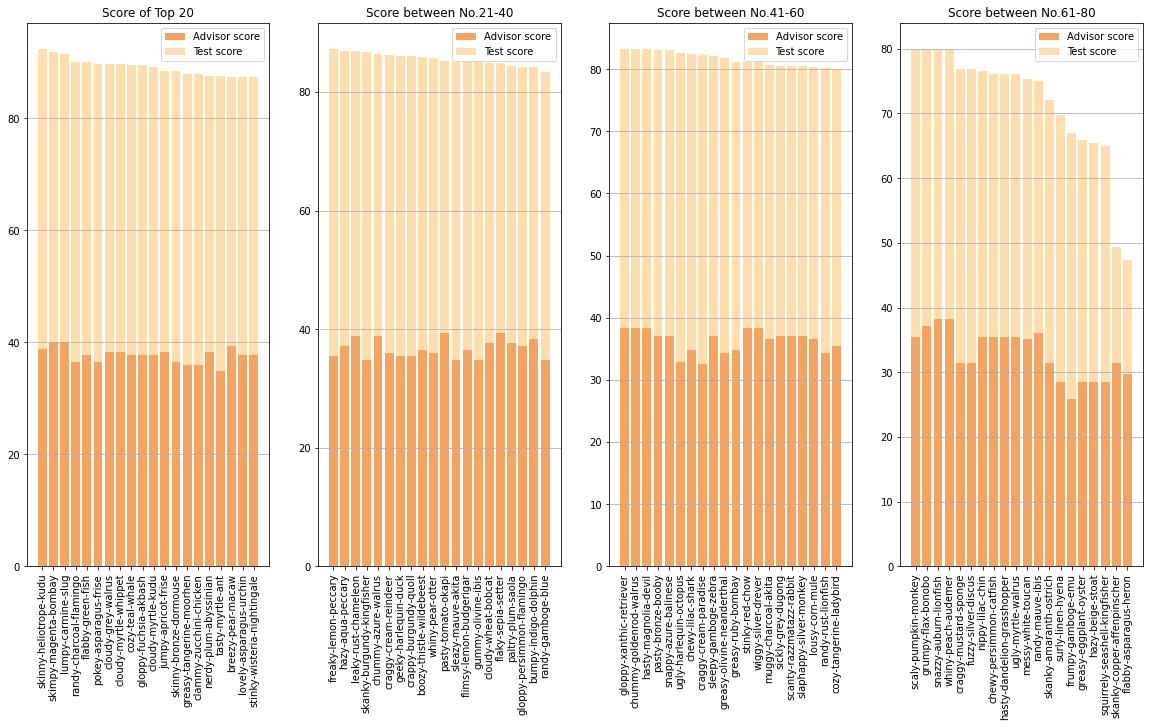

In [131]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[20,10]
from matplotlib import pyplot as plt

plt.subplot(1,4,1) 
plt.bar(Stac['นักศึกษา'].iloc[:20],Stac['รวมคะแนนจากอาจารย์ที่ปรึกษา'].iloc[:20],color='#F4A460',label='Advisor score') # ความสูงของบาร์ก่อนหน้า
plt.bar(Stac['นักศึกษา'].iloc[:20],Stac['รวมคะแนนจากการสอบ'].iloc[:20],bottom=Stac['รวมคะแนนจากอาจารย์ที่ปรึกษา'].iloc[:20],color='#FFDEAD',label='Test score') # bottom=sample_data['PetalLength']  ฐานจะเริ่มตรงไหน
plt.xticks( Stac.reset_index()['นักศึกษา'].iloc[:20],rotation=90)
plt.grid(True,axis='y')
plt.title('Score of Top 20')
plt.legend();

plt.subplot(1,4,2) 
plt.bar(Stac['นักศึกษา'].iloc[20:40],Stac['รวมคะแนนจากอาจารย์ที่ปรึกษา'].iloc[20:40],color='#F4A460',label='Advisor score') # ความสูงของบาร์ก่อนหน้า
plt.bar(Stac['นักศึกษา'].iloc[20:40],Stac['รวมคะแนนจากการสอบ'].iloc[20:40],bottom=Stac['รวมคะแนนจากอาจารย์ที่ปรึกษา'].iloc[20:40],color='#FFDEAD',label='Test score') # bottom=sample_data['PetalLength']  ฐานจะเริ่มตรงไหน
plt.xticks( Stac.reset_index()['นักศึกษา'].iloc[20:40],rotation=90)
plt.title('Score between No.21-40')
plt.grid(True,axis='y')
plt.legend();

plt.subplot(1,4,3) 
plt.bar(Stac['นักศึกษา'].iloc[40:60],Stac['รวมคะแนนจากอาจารย์ที่ปรึกษา'].iloc[40:60],color='#F4A460',label='Advisor score') # ความสูงของบาร์ก่อนหน้า
plt.bar(Stac['นักศึกษา'].iloc[40:60],Stac['รวมคะแนนจากการสอบ'].iloc[40:60],bottom=Stac['รวมคะแนนจากอาจารย์ที่ปรึกษา'].iloc[40:60],color='#FFDEAD',label='Test score') # bottom=sample_data['PetalLength']  ฐานจะเริ่มตรงไหน
plt.xticks( Stac.reset_index()['นักศึกษา'].iloc[40:60],rotation=90)
plt.title('Score between No.41-60')
plt.grid(True,axis='y')
plt.legend();

plt.subplot(1,4,4) 
plt.bar(Stac['นักศึกษา'].iloc[60:],Stac['รวมคะแนนจากอาจารย์ที่ปรึกษา'].iloc[60:],color='#F4A460',label='Advisor score') # ความสูงของบาร์ก่อนหน้า
plt.bar(Stac['นักศึกษา'].iloc[60:],Stac['รวมคะแนนจากการสอบ'].iloc[60:],bottom=Stac['รวมคะแนนจากอาจารย์ที่ปรึกษา'].iloc[60:],color='#FFDEAD',label='Test score') # bottom=sample_data['PetalLength']  ฐานจะเริ่มตรงไหน
plt.xticks( Stac.reset_index()['นักศึกษา'].iloc[60:],rotation=90)
plt.title('Score between No.61-80')
plt.grid(True,axis='y')
plt.legend();

### - Histogram แสดงจำนวนผู้ได้เกรดต่างๆ

In [155]:
scoresall.columns

Index(['นักศึกษา', 'ชื่อเรื่อง', 'รวมคะแนนจากอาจารย์ที่ปรึกษา',
       'รวมคะแนนจากการสอบ', 'คะแนนรวม', 'Grade'],
      dtype='object')

In [156]:
scoresall_C = scoresall[['Grade']]
scoresall_C.head(3)

,Grade
0,A
1,A
2,A


Text(0, 0.5, 'Quantity')

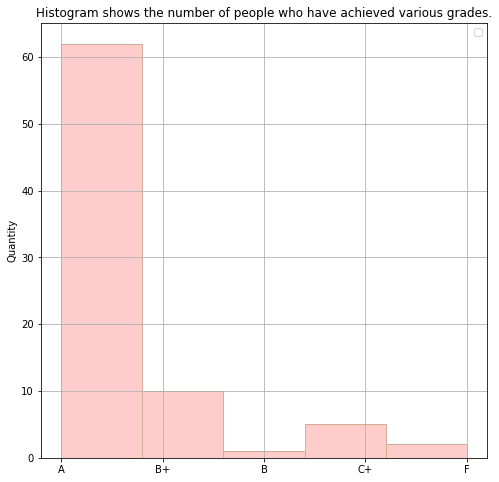

In [158]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[8,8]
plt.title('Grade');
scoresall_C['Grade'].hist(rwidth=30,ec="#CDAF95", fc="#FFCCCC",bins = 5)

plt.legend();
plt.title('Histogram shows the number of people who have achieved various grades.')
plt.grid(True)
plt.ylabel('Quantity')

###  Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา

In [86]:
testday #ทำการปรับค่าคะแนนแล้ว

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,รวม
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,22.285714
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,21.428571
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,25.714286
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,24.857143
5,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,22.285714
...,...,...,...,...,...,...,...
50,SC 6410,10:00 – 12.00 น.,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...,muggy-charcoal-akita,ดร.พลากร,ผศ.วุฒิชัย,22.285714
51,SC 6410,13:00 – 15.00 น.,42.การพัฒนาระบบสารสนเทศการสั่งอาหารร้านปลาวาฬใ...,stinky-wisteria-nightingale,ดร.พลากร,รศ.วิชุดา,24.428571
52,SC 6410,13:00 – 15.00 น.,42.การพัฒนาระบบสารสนเทศการสั่งอาหารร้านปลาวาฬใ...,hazy-aqua-peccary,ดร.พลากร,รศ.วิชุดา,24.428571
53,SC 6410,13:00 – 15.00 น.,42.การพัฒนาระบบสารสนเทศการสั่งอาหารร้านปลาวาฬใ...,stinky-wisteria-nightingale,ดร.พลากร,ดร.ธนพงศ์,25.285714


In [87]:
 set(list(testday['กรรมการสอบ'].dropna()))

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.ธิดาเดียว',
 'รศ.วิชุดา',
 'รศ.สุพรรณี',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [88]:
A = testday[(testday['กรรมการสอบ']=='ดร.ธนพงศ์')]
B = testday[(testday['กรรมการสอบ']=='ดร.ธิปไตย')]
C = testday[(testday['กรรมการสอบ']=='ดร.พลากร')]
D = testday[(testday['กรรมการสอบ']=='ดร.วรรณพร')]
E = testday[(testday['กรรมการสอบ']=='ดร.อุทุมพร')]
F = testday[(testday['กรรมการสอบ']=='ผศ.วุฒิชัย')]
G = testday[(testday['กรรมการสอบ']=='ผศ.สุกัญญา')]
H = testday[(testday['กรรมการสอบ']=='รศ.ธิดาเดียว')]
I = testday[(testday['กรรมการสอบ']=='รศ.วิชุดา')]
J = testday[(testday['กรรมการสอบ']=='รศ.สุพรรณี')]
K = testday[(testday['กรรมการสอบ']=='อ.ธรรณญพร')]
L = testday[(testday['กรรมการสอบ']=='อ.ยุภาพร')]

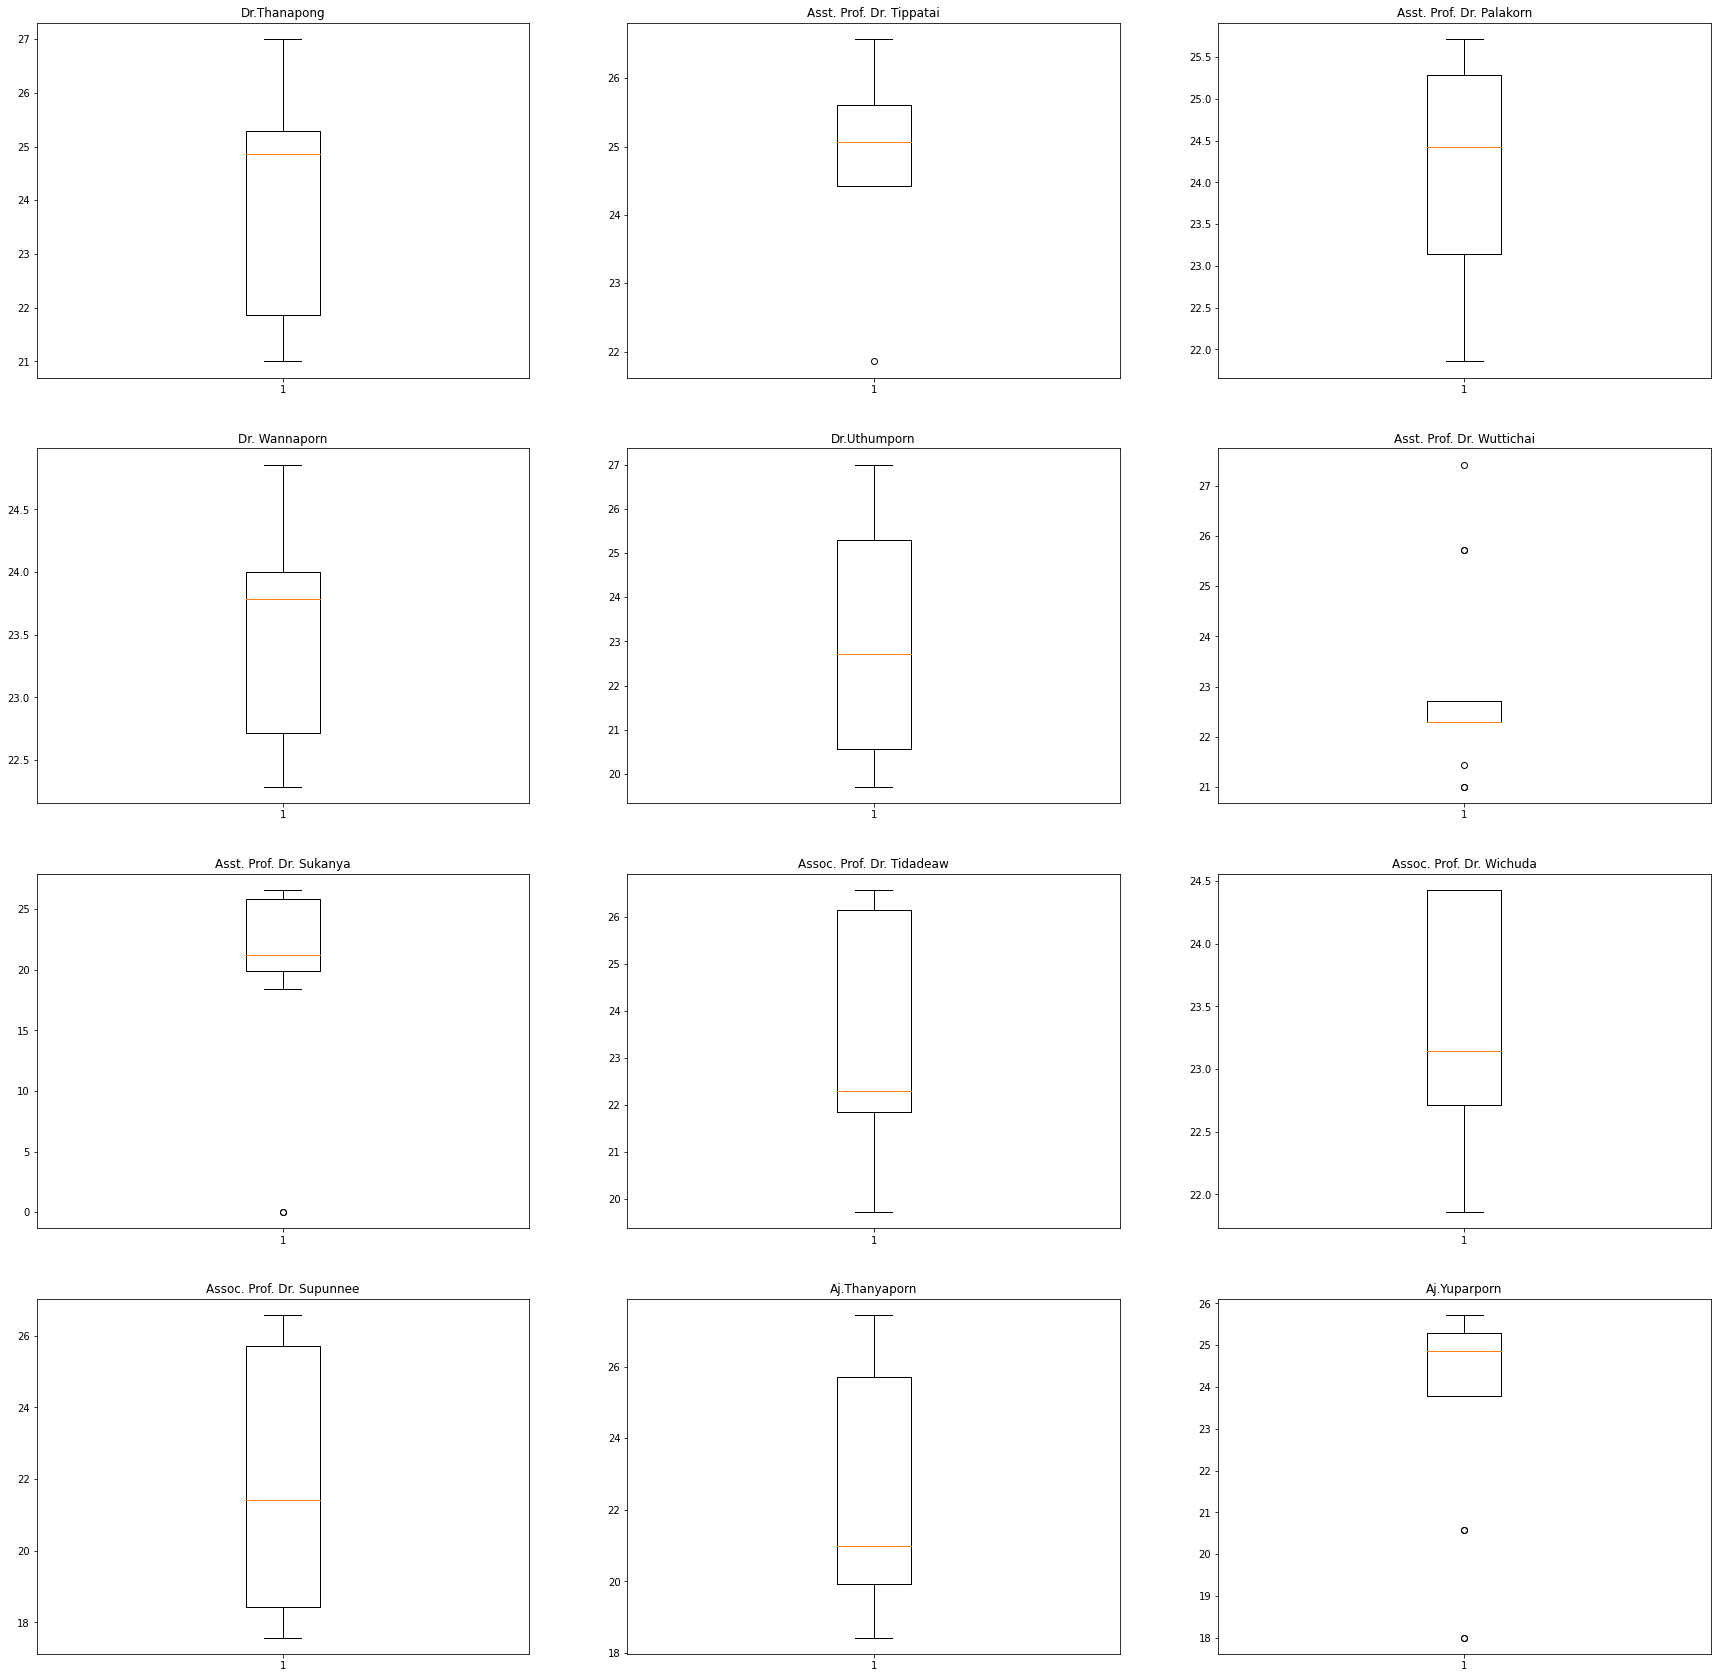

In [115]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize']=[30,30] # กำหนดขนาดกราฟ

plt.subplot(4,3,1) #ดร.ธนพงศ์
plt.boxplot(A['รวม']);
plt.title('Dr.Thanapong')

plt.subplot(4,3,2) #ดร.ธิปไตย
plt.boxplot(B['รวม']);
plt.title('Asst. Prof. Dr. Tippatai')

plt.subplot(4,3,3) #ดร.พลากร
plt.boxplot(C['รวม']);
plt.title('Asst. Prof. Dr. Palakorn')

plt.subplot(4,3,4) #ดร.วรรณพร
plt.boxplot(D['รวม']);
plt.title('Dr. Wannaporn')

plt.subplot(4,3,5) #ดร.อุทุมพร
plt.boxplot(E['รวม']);
plt.title('Dr.Uthumporn')

plt.subplot(4,3,6) #ผศ.วุฒิชัย
plt.boxplot(F['รวม']);
plt.title('Asst. Prof. Dr. Wuttichai')

plt.subplot(4,3,7) #ผศ.สุกัญญา
plt.boxplot(G['รวม']);
plt.title('Asst. Prof. Dr. Sukanya')

plt.subplot(4,3,8) #รศ.ธิดาเดียว
plt.boxplot(H['รวม']);
plt.title('Assoc. Prof. Dr. Tidadeaw')

plt.subplot(4,3,9) #รศ.วิชุดา
plt.boxplot(I['รวม']);
plt.title('Assoc. Prof. Dr. Wichuda')

plt.subplot(4,3,10) #รศ.สุพรรณี
plt.boxplot(J['รวม']);
plt.title('Assoc. Prof. Dr. Supunnee')

plt.subplot(4,3,11) #อ.ธรรณญพร
plt.boxplot(K['รวม']);
plt.title('Aj.Thanyaporn')

plt.subplot(4,3,12) #อ.ยุภาพร
plt.boxplot(L['รวม']);
plt.title('Aj.Yuparporn');